In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb


In [49]:
#Import csv

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
#Looking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
# Name, ticket and Passenger id are basically useless 
# ( we _could_ infere something from the titles included in names, 
# but it's a story for another day)
# Cabin column (majority of null values) will be dropped, 
# as will be the 2 rows with missing embarked,
# but Age should be imputed (filling with mean?)

df['Age'] = df['Age'].fillna(df['Age'].mean())
df = df.drop(['Cabin', 'Name', 'PassengerId','Ticket'], axis=1)
df = df.dropna(axis=0)

In [53]:
df.isna().sum()
#Well done guys / Bravo à tous

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [54]:
# beside fare and age, all others variables are categorical and should be encoded
df= pd.get_dummies(data=df, columns=['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked'], dtype=int)
df.describe()
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,38.0,71.2833,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,35.0,53.1000,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [55]:
# scaling data
colonnes = df.columns
scaler = MinMaxScaler()
df[colonnes] = scaler.fit_transform(df)
df

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.472229,0.139136,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.434531,0.103644,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.015713,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.334004,0.025374,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1.0,0.233476,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.0,0.367921,0.045771,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1.0,0.321438,0.058556,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [56]:
# train _ test splitting
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Survived'], axis=1), df['Survived'], random_state=42)

In [57]:
# Code Factorisation

dico_model = { 
    GradientBoostingClassifier : {'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 8]},
    lgb.LGBMClassifier : {'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 8]},
    xgb.XGBClassifier : { 'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 8]},
    LogisticRegression : {'max_iter' : [50, 100 , 200 , 500],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']},
    SVC : {'kernel' : ['linear', 'poly','rbf', 'sigmoid']},
    Perceptron : {'max_iter' : [100, 200, 500, 1000],
    'eta0' : [0.5, 1, 1.5]}
}

def model_comp(x_train, x_test, y_train, y_test, modeldictionnary):
    ''' Function to compare different models and librairies
        
        input : 4 train/test splits : xtrain, xtest, ytrain, ytest
                modeldictionnary : dict containing model in sklearn object format as key, paramaters grid dict as values
                
        output: metrics dataframe, best estimators dict, confusion matrices dict'''
    
    #preformatting outputs
    output = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    estimators= dict()
    confusion = dict()

    #Extracting model
    for i, (model, param) in enumerate(modeldictionnary.items()):
        #declaring model 
        mod = model()

        #grid
        grid = GridSearchCV(mod, param, cv = 5, verbose= 2 , n_jobs=-1, refit= False)
        grid.fit(x_train, y_train)

        #Extracting Best Parameters
        best_params = grid.best_params_
        #fitting model with best parameters
        best_mod = model(**best_params)
        best_mod.fit(x_train, y_train)
        y_hat= best_mod.predict(x_test)

        #computing metrics
        accuracy = accuracy_score(y_test, y_hat)
        precision = precision_score(y_test, y_hat)
        recall = recall_score(y_test, y_hat)
        f1= f1_score(y_test, y_hat)
        metrics = [accuracy, precision, recall, f1]
        
        #output format
        output.loc[mod.__class__.__name__] = metrics
        #saving best estimators in a dict
        estimators[mod.__class__.__name__] = best_mod
        #saving confusion matrix
        conf_matrix = confusion_matrix(y_test, y_hat)
        conf_matrix = conf_matrix/ conf_matrix.sum(axis = 1)
        confusion[mod.__class__.__name__] = conf_matrix
        #saving features importance


    return output.style.highlight_max(color='darkgrey'), estimators, confusion
        
sortie_df, best_estimators, conf_matr = model_comp(x_train,x_test, y_train, y_test, dico_model)
sortie_df

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


,Accuracy,Precision,Recall,F1 Score
GradientBoostingClassifier,0.816143,0.788732,0.682927,0.732026
LGBMClassifier,0.798206,0.734177,0.707317,0.720497
XGBClassifier,0.825112,0.772152,0.743902,0.757764
LogisticRegression,0.811659,0.738095,0.756098,0.746988
SVC,0.789238,0.727273,0.682927,0.704403
Perceptron,0.408072,0.378641,0.951220,0.541667


Error with SVC features importances coef_ is only available when using a linear kernel


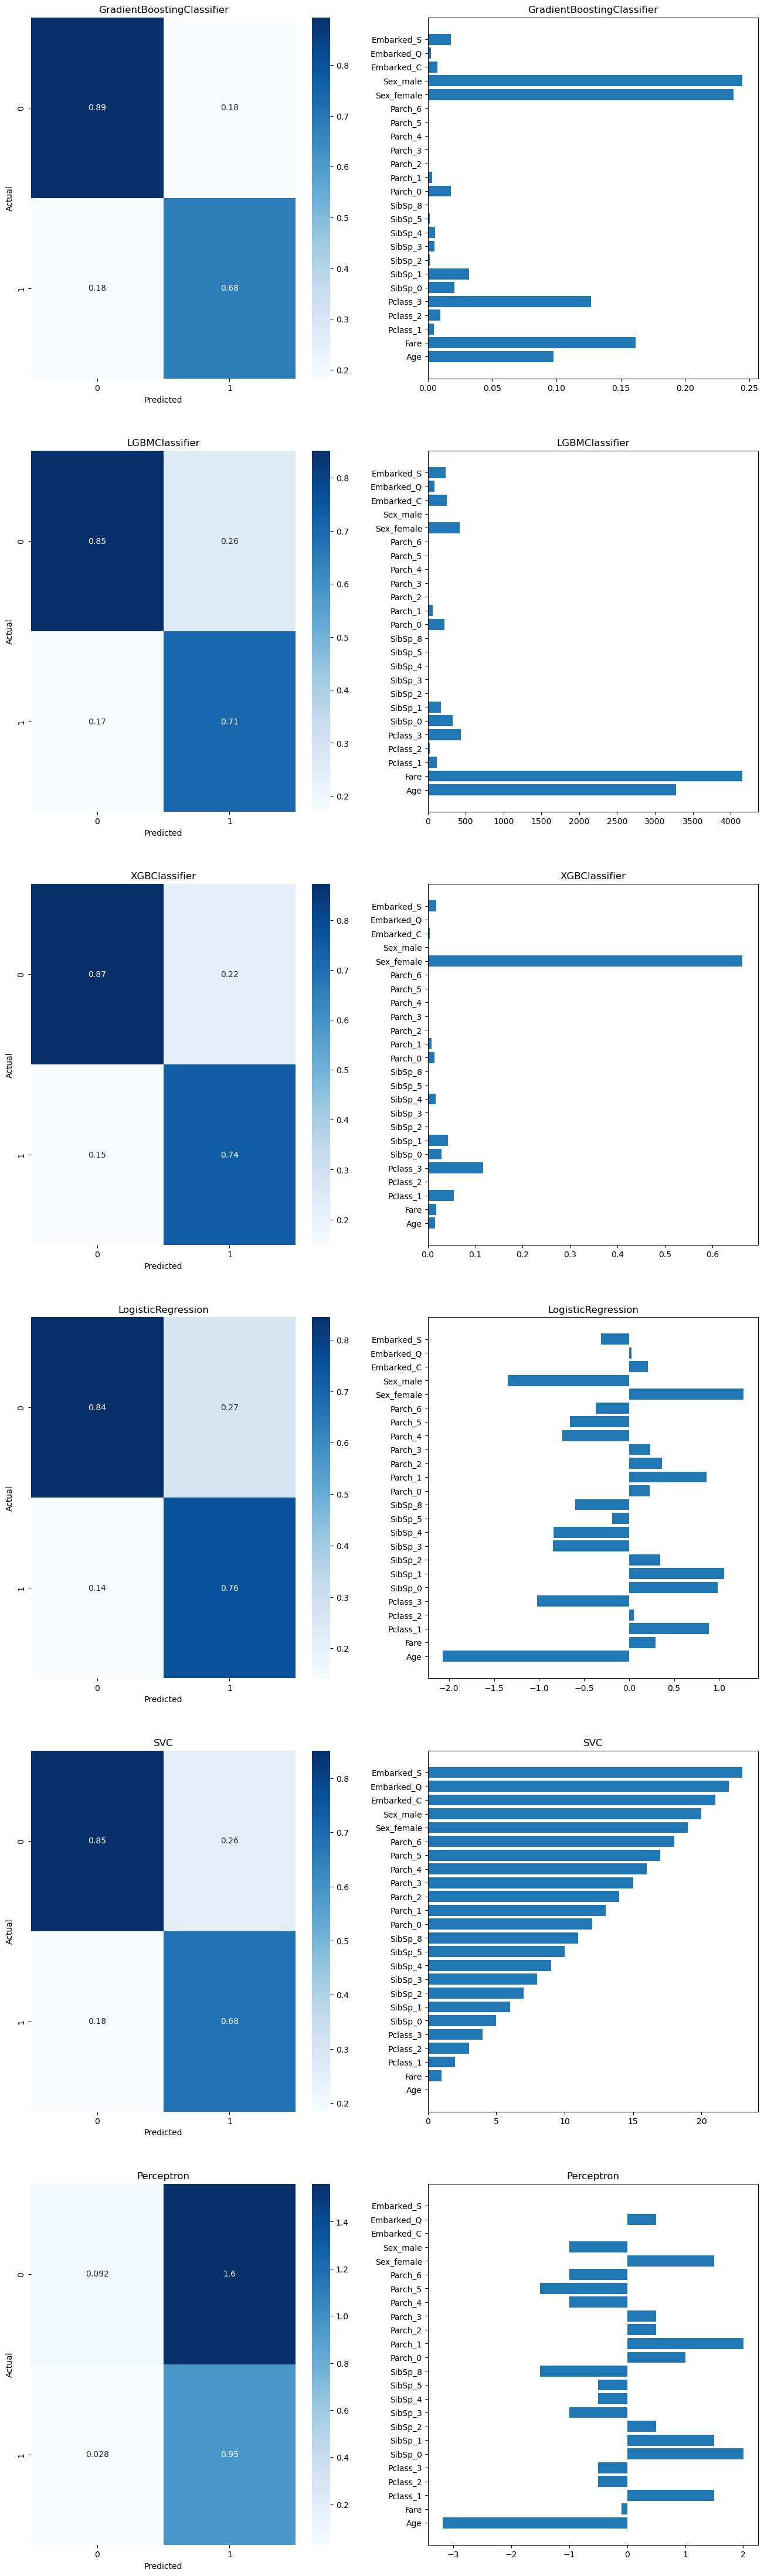

In [63]:
# Plotting confusion matrix and features importances for each model

fig = plt.figure(figsize=(16,56))
my_grid = fig.add_gridspec(len(conf_matr), 2, 
                           width_ratios = (1, 1),
                            wspace = 0.2,
                            hspace = 0.2,
                           )

for i, (model, conf) in enumerate(conf_matr.items()):
    ax = fig.add_subplot(my_grid[i,0])
    sns.heatmap(conf, cmap='Blues', annot=True, ax = ax)
    ax.set_title(model)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

for i, (model, object) in enumerate(best_estimators.items()):
    ax = fig.add_subplot(my_grid[i,1])
    try: 
        features_imp = object.feature_importances_
    except (AttributeError):
        try:
            features_imp = object.coef_.ravel()
        except (Exception) as e:
            print(f'Error with {model} features importances :', e)
            features_imp = range(24)
    plt.barh(df.drop(['Survived'], axis=1).columns, features_imp, height= 0.8)
    ax.set_title(model)